<h1 align="center"> Hardware Vendor used by IXP Participants  </h1>

Author:

    - Joao M. Ceron (SIDNLabs)

In [5]:
# imports

import os
import re
import numpy as np
import pandas as pd

# graphs
from IPython.core.display import display, HTML
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as plticker
import seaborn as sns
plt.style.use('default')
sns.set(style="ticks", color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## subrotines
<a id='section_id'></a>


In [6]:
def top_n_dataframe(n,dataframe_field):
    """
        Find the TOP "N" the remains are summarized as "others"   
    """
    top_n = n
    field_name = dataframe_field.name
    top  = dataframe_field.value_counts()[:top_n].to_frame().reset_index()

    new_row = pd.DataFrame(data = {
        'count' : [ dataframe_field.value_counts()[top_n:].sum()],
        field_name : ['others'],
    })

    top.columns = [field_name, 'count']
    top.set_index([field_name]).reset_index()
    top_result = pd.concat([top, new_row],sort=False)
    
    # percentage field
    df = top_result.groupby(field_name).sum() 
    df=df.sort_values(by="count", ascending=False)
    df['percent'] = df.transform(lambda x: (x/np.sum(x)*100))
    df['percent'] = df['percent'].round(2)
    return (df)

In [14]:
def ixp_name_rewrite(filename):
    """
        Rewrite the IXP name to fits well in the graph
    """
    if re.match(r"arp.**.*translated", file):
        title = "ANON_Amsterdam"
    elif re.match(r"arp.*flix.*translated", file):
        title = "FLIX - Florida/USA"
    elif re.match(r"arp.*londrina.*", file):
        title = "IXP.br - Londrina/Brazil"
    elif re.match(r"arp.*poa.*", file):
        title = "IXP.br - RS/Brazil"
    elif re.match(r"arp.*pr.*", file):
        title = "IXP.br - PR/Brazil"
    elif re.match(r"arp.*ixp_sp.*", file):
        title = "IXP.br - SP/Brazil"
    elif re.match(r"arp.**.*", file):
        title = "ANON_London"
    elif re.match(r"arp.*speed.*", file):
        title = "Speed-IX - Netherlands"
    elif re.match(r"arp.msk-ix.txt-translated", file):
        title = "MSK-IX - Moscow"    
    elif re.match(r"arp.*france.*translated", file):
        title = "France-IX - Paris"
    elif re.match(r"arp.*asteroid.*translated", file):
        title = "Asteroid IXP - Netherlands"
    elif re.match(r"arp.*nlix.*translated", file):
        title = "NL-IX - Netherlands"
    elif re.match(r"arp.*bangkok.*translated", file):
        title = "BKNIX - Bangkok - Thailand"
    elif re.match(r"arp.*brisbane.*translated", file):
        title = "EDGEIX - Brisbane - Australia"  
    elif re.match(r"arp.decix.txt", file):
        title = "DE-CIX - All Locations"
    else:
        title = file
    return (title)

In [15]:
def init_fig():
    """
        Default setting for images
    """
    fig = plt.figure(figsize=(8, 4))
    ax = plt.subplot(111)   
    ax = plt.subplot2grid((1,1), (0,0))    
    ax.set_facecolor("#ffffffff")
    return (fig,ax)

In [16]:
def plot_graph(field, title):
    
    (fig,ax) = init_fig()
    field.plot(kind="bar", ax=ax)
    ax.set_xlabel('MAC address vendor')
    ax.set_ylabel('# percent of devices')
    ax.xaxis.label.set_color('grey')
    ax.yaxis.grid(color='grey', linestyle='dotted', linewidth=0.5)
    ax.set_title(title);

    ax.set_ylim(bottom=0, top=50)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()

In [17]:
# MAC list 
df_mac_all = pd.read_csv("./dataset/macaddress.io-db.csv.gz", low_memory=False).dropna()
df_mac_all.head(1)

,oui,isPrivate,companyName,companyAddress,countryCode,assignmentBlockSize,dateCreated,dateUpdated
0,00:E0:0D,0,Radiant Systems,1000 ALDERMAN DR. ALPHARETTA GA 30202 US,US,MA-L,1980-01-01,2015-09-27




<h2 align="center"> Detailed view from IXP vendors </h2>

                    count  percent
companyName                       
Cisco Systems, Inc      9     45.0
Juniper Networks        5     25.0
Routerboard.com         3     15.0
Arista Networks         2     10.0
Ibm Corp                1      5.0
others                  0      0.0


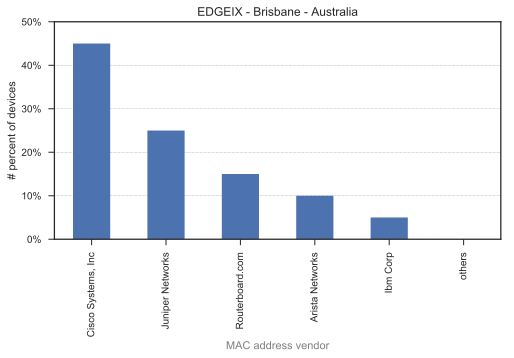

                                    count  percent
companyName                                       
Juniper Networks                       96    45.71
Cisco Systems, Inc                     64    30.48
Arista Networks                        14     6.67
Brocade Communications Systems Llc     12     5.71
Nokia                                   6     2.86
others                                  5     2.38
VMware, Inc                             4     1.90
Super Micro Computer, Inc               3     1.43
Huawei Tech Co, Ltd                     2     0.95
Icann, Iana Department                  2     0.95
Pcs Systemtechnik GmbH                  2     0.95


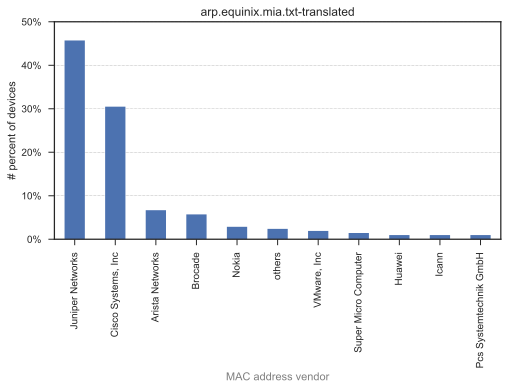

                                    count  percent
companyName                                       
Cisco Systems, Inc                    155    48.90
Juniper Networks                       80    25.24
Huawei Tech Co, Ltd                    25     7.89
others                                 22     6.94
Intel Corp                             10     3.15
Brocade Communications Systems Llc      5     1.58
Hewlett Packard                         5     1.58
Routerboard.com                         5     1.58
Arista Networks                         4     1.26
Alcatel-Lucent Ipd                      3     0.95
Super Micro Computer, Inc               3     0.95


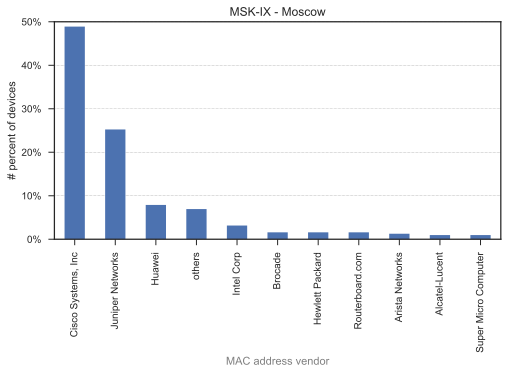

                                    count  percent
companyName                                       
Juniper Networks                      134    42.68
Cisco Systems, Inc                     79    25.16
Arista Networks                        30     9.55
Brocade Communications Systems Llc     15     4.78
Routerboard.com                        13     4.14
Intel Corp                             12     3.82
VMware, Inc                            11     3.50
Icann, Iana Department                  6     1.91
others                                  6     1.91
Nokia                                   5     1.59
Dell Inc                                3     0.96


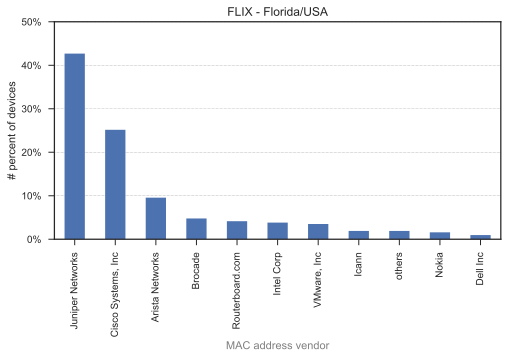

                                    count  percent
companyName                                       
Juniper Networks                     3477    41.56
Cisco Systems, Inc                   2594    31.00
others                                658     7.86
Routerboard.com                       398     4.76
Arista Networks                       294     3.51
Huawei Tech Co, Ltd                   252     3.01
Brocade Communications Systems Llc    214     2.56
Super Micro Computer, Inc             142     1.70
VMware, Inc                           124     1.48
Nokia                                 110     1.31
Hewlett Packard                       104     1.24


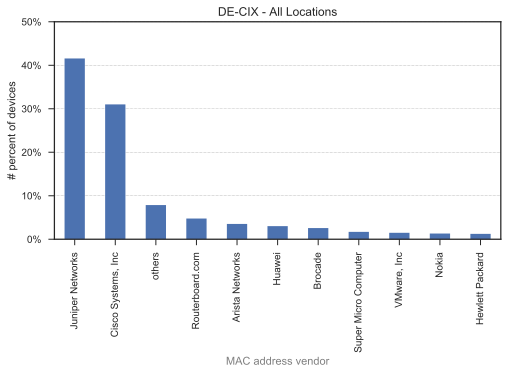

                     count  percent
companyName                        
Huawei Tech Co, Ltd      9    24.32
Routerboard.com          8    21.62
Cisco Systems, Inc       5    13.51
Juniper Networks         5    13.51
Dell Inc                 3     8.11
Ericsson                 2     5.41
Alcatel-Lucent Ipd       1     2.70
Broadcom                 1     2.70
Fortinet Inc             1     2.70
Intel Corp               1     2.70
others                   1     2.70


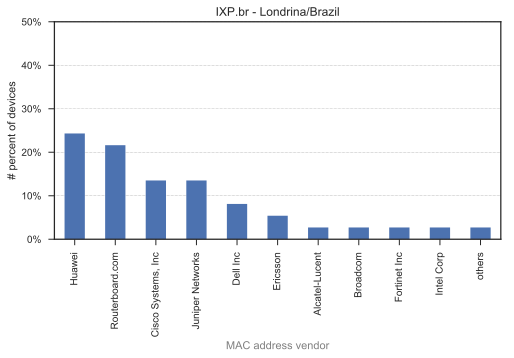

                                    count  percent
companyName                                       
Juniper Networks                       42    33.07
Cisco Systems, Inc                     22    17.32
Routerboard.com                        11     8.66
others                                 10     7.87
Huawei Tech Co, Ltd                     9     7.09
Arista Networks                         8     6.30
Brocade Communications Systems Llc      8     6.30
Intel Corp                              6     4.72
VMware, Inc                             6     4.72
Extreme Networks, Inc                   3     2.36
Dell Inc                                2     1.57


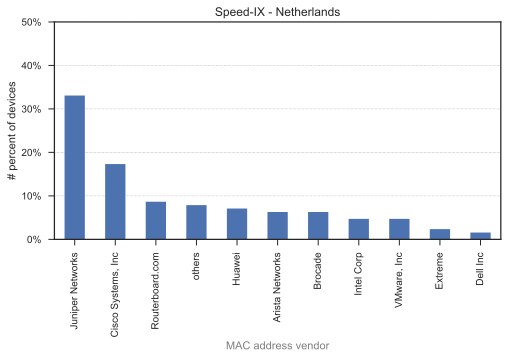

                     count  percent
companyName                        
Huawei Tech Co, Ltd     48    30.00
Juniper Networks        35    21.88
Routerboard.com         27    16.88
Cisco Systems, Inc      14     8.75
others                  11     6.88
Dell Inc                 9     5.62
Intel Corp               6     3.75
Nokia                    3     1.88
ServerU Inc              3     1.88
Ericsson                 2     1.25
VMware, Inc              2     1.25


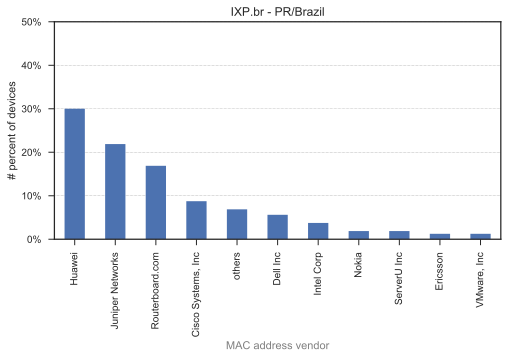

                                    count  percent
companyName                                       
Cisco Systems, Inc                     96    36.09
Juniper Networks                       83    31.20
others                                 21     7.89
Brocade Communications Systems Llc     18     6.77
Arista Networks                        13     4.89
Intel Corp                             10     3.76
Routerboard.com                         8     3.01
Huawei Tech Co, Ltd                     7     2.63
Super Micro Computer, Inc               4     1.50
Nokia                                   3     1.13
VMware, Inc                             3     1.13


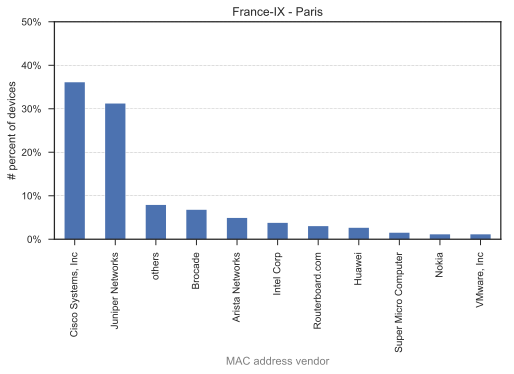

                        count  percent
companyName                           
Cisco Systems, Inc         20     40.0
Juniper Networks           11     22.0
Digital Equipment Corp      8     16.0
VMware, Inc                 4      8.0
Huawei Tech Co, Ltd         2      4.0
Arista Networks             1      2.0
Force10 Networks, Inc       1      2.0
Fortinet Inc                1      2.0
Intel Corp                  1      2.0
Jetcell, Inc                1      2.0
others                      0      0.0


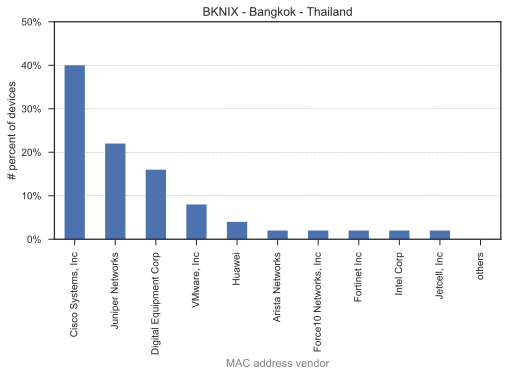

                                    count  percent
companyName                                       
Juniper Networks                      418    45.24
Cisco Systems, Inc                    258    27.92
Brocade Communications Systems Llc     44     4.76
Intel Corp                             44     4.76
others                                 37     4.00
Arista Networks                        34     3.68
Huawei Tech Co, Ltd                    28     3.03
Routerboard.com                        18     1.95
Nokia                                  15     1.62
Super Micro Computer, Inc              15     1.62
Dell Inc                               13     1.41


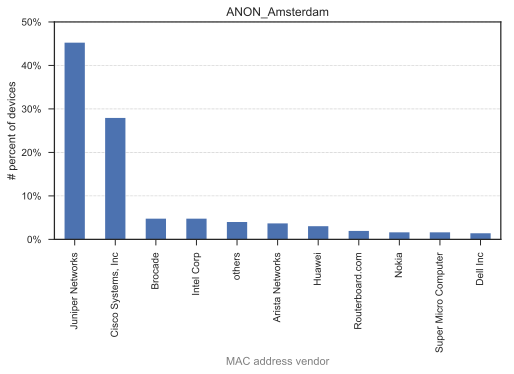

                       count  percent
companyName                          
Routerboard.com          586    28.90
Juniper Networks         473    23.32
Huawei Tech Co, Ltd      472    23.27
Cisco Systems, Inc       182     8.97
Intel Corp                98     4.83
others                    90     4.44
Dell Inc                  32     1.58
Broadcom                  28     1.38
ServerU Inc               26     1.28
Ubiquiti Networks Inc     22     1.08
Arista Networks           19     0.94


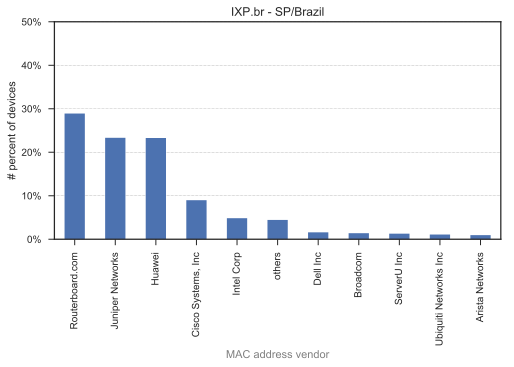

                                    count  percent
companyName                                       
Juniper Networks                       12    44.44
Arista Networks                         4    14.81
Brocade Communications Systems Llc      4    14.81
Cisco Systems, Inc                      2     7.41
Super Micro Computer, Inc               2     7.41
Chelsio Communications                  1     3.70
Nokia                                   1     3.70
Shenzhen Winyao Electronic Ltd          1     3.70
others                                  0     0.00


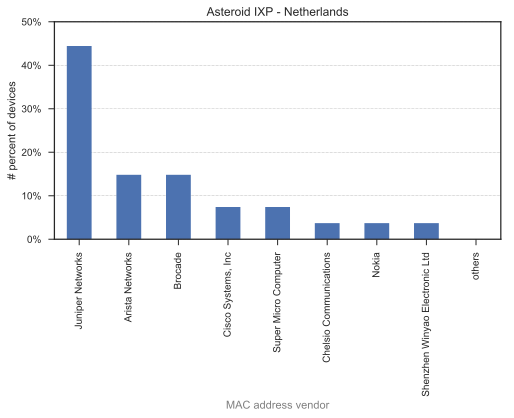

                                    count  percent
companyName                                       
Juniper Networks                      176    41.90
Cisco Systems, Inc                    108    25.71
Brocade Communications Systems Llc     45    10.71
others                                 24     5.71
VMware, Inc                            18     4.29
Huawei Tech Co, Ltd                    12     2.86
Arista Networks                        10     2.38
Intel Corp                              8     1.90
Nokia                                   7     1.67
Dell Inc                                6     1.43
Hewlett Packard                         6     1.43


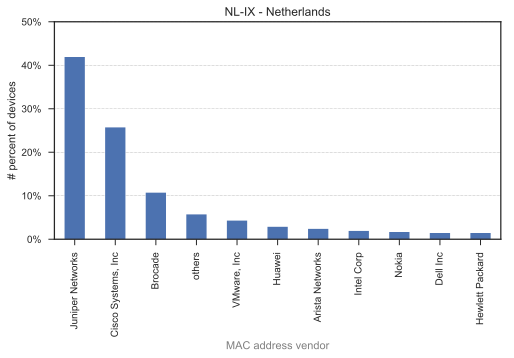

                                    count  percent
companyName                                       
Juniper Networks                      521    39.38
Cisco Systems, Inc                    435    32.88
others                                 96     7.26
Brocade Communications Systems Llc     64     4.84
Arista Networks                        41     3.10
Intel Corp                             40     3.02
Huawei Tech Co, Ltd                    39     2.95
Routerboard.com                        35     2.65
VMware, Inc                            23     1.74
Nokia                                  16     1.21
Super Micro Computer, Inc              13     0.98


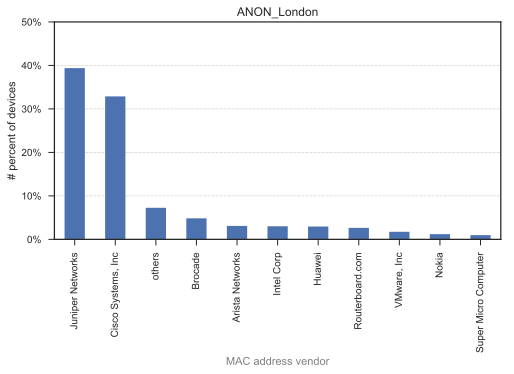

                                                    count  percent
companyName                                                       
Routerboard.com                                        63    34.62
Huawei Tech Co, Ltd                                    35    19.23
Juniper Networks                                       34    18.68
Cisco Systems, Inc                                     22    12.09
others                                                 10     5.49
Dell Inc                                                4     2.20
Intel Corp                                              4     2.20
Brocade Communications Systems Llc                      3     1.65
Nic.br- Nucleo de Informacao e Coordenacao do P...      3     1.65
Broadcom                                                2     1.10
Ubiquiti Networks Inc                                   2     1.10


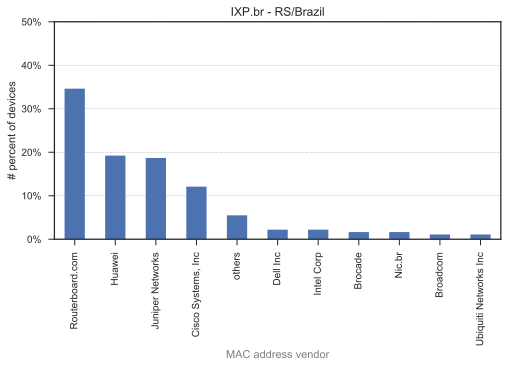

In [18]:
dataset_dir = "./dataset/"
df_all = pd.DataFrame()
for file in os.listdir(dataset_dir):
    if re.match(r"arp.*translated", file):
        df = pd.read_csv(dataset_dir+file, low_memory=False, index_col=None, sep=";",names=["mac", 'vendor'])
        df['mac'] = df['mac'].str.upper() 
        df['mac']  = df.mac.str.extract('([0-9A-F]{2}:[0-9A-F]{2}:[0-9A-F]{2})')
        df["mac"] = df.mac.str.split(":").str[:3] 
        df["mac"] = df["mac"].str.join(":")
        df = pd.merge(df,df_mac_all, left_on=["mac"],right_on=["oui"])
        df = df[['mac','companyName','countryCode']]
        df_top = top_n_dataframe(10, df.companyName)
        
        title = ixp_name_rewrite(file)        
        df_top['ixp'] = title
        header = "<h2 style=\"color:#069\" >{} </h2>".format(title)
        display(HTML(header))
        print (df_top.iloc[:,:2])
        df_top = df_top.reset_index()
        df_top.loc[df_top.companyName.str.contains("Brocade"),'companyName'] = "Brocade"
        df_top.loc[df_top.companyName.str.contains("Huawei"),'companyName'] = "Huawei"
        df_top.loc[df_top.companyName.str.contains("Icann"),'companyName'] = "Icann"
        df_top.loc[df_top.companyName.str.contains("Super Micro Computer, Inc"),'companyName'] = "Super Micro Computer"
        df_top.loc[df_top.companyName.str.contains("Ieee"),'companyName'] = "Ieee"
        df_top.loc[df_top.companyName.str.contains("Extreme"),'companyName'] = "Extreme"
        df_top.loc[df_top.companyName.str.contains("Nic"),'companyName'] = "Nic.br"
        df_top.loc[df_top.companyName.str.contains("Alcatel"),'companyName'] = "Alcatel-Lucent"

        df_top = df_top.set_index("companyName")
        plot_graph(df_top['percent'],title)
        df_all = pd.concat([df_top.reset_index(),df_all], ignore_index=True)
#         break

<h1 align="center"> Heatmap - All IXPs</h1>

## hardware vendor

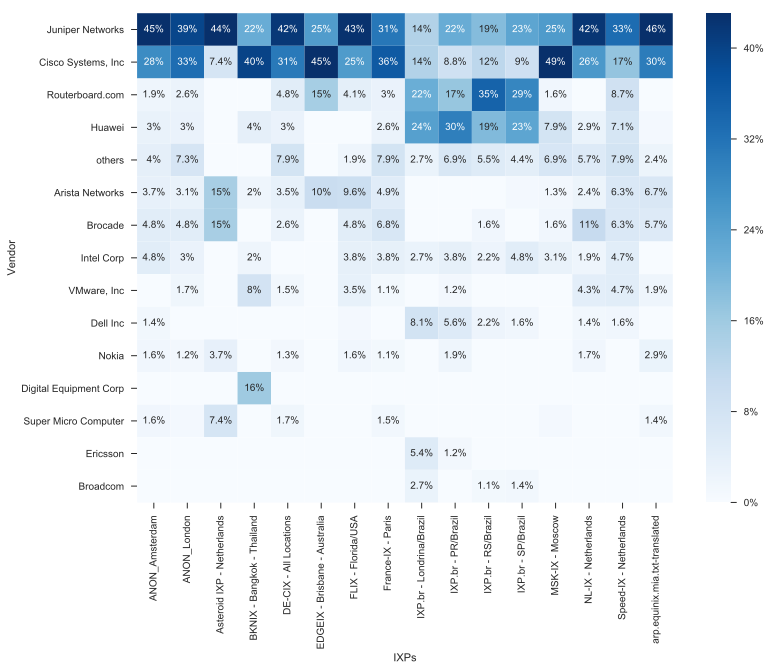

In [19]:
# normalize values
data = pd.pivot_table(df_all, index = ['companyName'], columns = 'ixp', aggfunc='sum', values = 'percent').fillna(0).apply(lambda x:100 * x / float(x.sum())).round(2)

# find top 15
data["sum"] = data.sum(axis=1)
data = data.sort_values(by='sum', ascending=False)[:15]
del data['sum']

# plot heatmap
fig = plt.figure(figsize=(12, 9))
ax = sns.heatmap(data[:15],
                 cmap="Blues",robust=True, 
                 cbar=True,
                 cbar_kws={'format': '%.0f%%'},
                 annot=True,
                 square=False,
                 annot_kws={'size':10},
                )
ax.set_xlabel('IXPs');
ax.set_ylabel('Vendor');
ax.set_facecolor("#ffffffff")
# avoid percentage plot bellow 1%
for t in ax.texts: 
    value = t.get_text()
    if (float(value) <1):
        t.set_text("")
    else:
        t.set_text(t.get_text() + "%")
fig.savefig("heatmap.svg", bbox_inches='tight',format='svg', dpi=1200)


## country code

In [20]:
df_mac_all.head(1)

,oui,isPrivate,companyName,companyAddress,countryCode,assignmentBlockSize,dateCreated,dateUpdated
0,00:E0:0D,0,Radiant Systems,1000 ALDERMAN DR. ALPHARETTA GA 30202 US,US,MA-L,1980-01-01,2015-09-27


In [21]:
dataset_dir = "/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/"
df_all = pd.DataFrame()
for file in os.listdir(dataset_dir):
    if re.match(r"arp.*translated", file):
        df = pd.read_csv(dataset_dir+file, low_memory=False, index_col=None, sep=";",names=["mac", 'vendor'])
        df['mac'] = df['mac'].str.upper() 
        df['mac']  = df.mac.str.extract('([0-9A-F]{2}:[0-9A-F]{2}:[0-9A-F]{2})')
        df["mac"] = df.mac.str.split(":").str[:3] 
        df["mac"] = df["mac"].str.join(":")
        df = pd.merge(df,df_mac_all, left_on=["mac"],right_on=["oui"])
        df = df[['mac','companyName','countryCode']]
        df_top = top_n_dataframe(10, df.countryCode)
        title = ixp_name_rewrite(file)        
        df_top['ixp'] = title
        df_all = pd.concat([df_top.reset_index(),df_all], ignore_index=True)

In [22]:
data = pd.pivot_table(df_all, index = ['countryCode'], columns = 'ixp', aggfunc='mean', values = 'percent').fillna(0)
data["sum"] = data.sum(axis=1)
data = data.sort_values(by='sum', ascending=False)[:5]

data = data[data["sum"]>2]
del data['sum']

In [23]:
# df_all.groupby('countryCode')
df_all.head(1)

,countryCode,count,percent,ixp
0,US,75,41.21,IXP.br - RS/Brazil


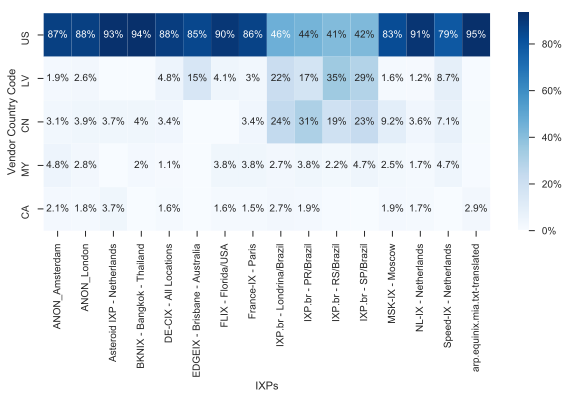

In [24]:
fig = plt.figure(figsize=(10, 4))

ax = sns.heatmap(data[:15],
                 cmap="Blues",robust=True, 
                 cbar=True,
                 cbar_kws={'format': '%.0f%%'},
                 annot=True,
                 square=False,
                 annot_kws={'size':10},
                )
for t in ax.texts: 
    value = t.get_text()
    if (float(value) <1):
        t.set_text("")
    else:
        t.set_text(t.get_text() + "%")
ax.set_xlabel('IXPs');
ax.set_ylabel('Vendor Country Code');
ax.set_facecolor("#ffffffff")
fig.savefig("heatmap-cc.svg", bbox_inches='tight',format='svg', dpi=1200)


In [25]:
dataset_dir = "/Users/joaoceron/work/SIDN/mac-ixp-investigation/dataset/"
df_all = pd.DataFrame()
for file in os.listdir(dataset_dir):
    if re.match(r"arp.*translated", file):
        df = pd.read_csv(dataset_dir+file, low_memory=False, index_col=None, sep=";",names=["mac", 'vendor'])
        df['mac'] = df['mac'].str.upper() 
        df['mac']  = df.mac.str.extract('([0-9A-F]{2}:[0-9A-F]{2}:[0-9A-F]{2})')
        df["mac"] = df.mac.str.split(":").str[:3] 
        df["mac"] = df["mac"].str.join(":")
        df = pd.merge(df,df_mac_all, left_on=["mac"],right_on=["oui"])
        df = df[['mac','companyName','countryCode']]
#         df_top = top_n_dataframe(10, df.countryCode)
#         df_top['ixp'] = title
        df_all = pd.concat([df.reset_index(),df_all], ignore_index=True)
df_all

,index,mac,companyName,countryCode
0,0,00:1A:4B,Hewlett Packard,US
1,1,E4:FC:82,Juniper Networks,US
2,2,BC:26:C7,"Cisco Systems, Inc",US
3,3,6C:3B:6B,Routerboard.com,LV
4,4,6C:3B:6B,Routerboard.com,LV
...,...,...,...,...
14767,15,6C:B2:AE,"Cisco Systems, Inc",US
14768,16,A0:23:9F,"Cisco Systems, Inc",US
14769,17,E4:5D:37,Juniper Networks,US
14770,18,00:06:29,Ibm Corp,US


In [26]:
df_all.groupby('countryCode')['companyName'].unique().tolist()

[array(['Nic.br- Nucleo de Informacao e Coordenacao do Ponto BR',
        'Teracom Telematica S.A'], dtype=object),
 array(['Nokia', 'Alcatel-Lucent Ipd', 'Broadband Networks, Inc', 'Exfo'],
       dtype=object),
 array(['PC Engines GmbH', 'Camille Bauer'], dtype=object),
 array(['Huawei Tech Co, Ltd', 'Shenzhen Winyao Electronic Ltd',
        'zte Corp', 'Globalscale Tech, Inc', 'Asound Electronic',
        'Advantech Tech (China) Co, Ltd', 'Xteam',
        'Wistron Infocomm (Zhongshan) Corp',
        'Shenzhen Lianrui Electronics Co, Ltd',
        'China Mobile Group Device Co, Ltd'], dtype=object),
 array(['Fujitsu Tech Solutions GmbH'], dtype=object),
 array(['At-Sky Sas'], dtype=object),
 array(['Sunrich Tech Ltd'], dtype=object),
 array(['Silicom, Ltd'], dtype=object),
 array(['Mix s.r.l.'], dtype=object),
 array(['Internix Inc', 'Plus Corp'], dtype=object),
 array(['Routerboard.com'], dtype=object),
 array(['Intel Corp'], dtype=object),
 array(['Allied Telesis Labs Ltd'], dtype=